# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Importing necessary Libraries
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm_notebook as tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#lists the content of your google drive
!ls "/content/drive/My Drive/AAIC"

final_features.csv  resources.csv  train.csv  train_data.csv


In [0]:
#To open a file
import pandas as pd

#read the data
project_data=pd.read_csv('drive/My Drive/AAIC/train_data.csv') #READ TRAIN.CSV
resource_data=pd.read_csv('drive/My Drive/AAIC/resources.csv') #read resources.csv

## 1.1.0 Reading Data

In [0]:
# Reading Data
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [0]:
# Merging two dataframes 

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [8]:
# Data Overview

print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 19)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'price' 'quantity']


In [9]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id  ...   price quantity
55660        8393  p205479  ...  725.05        4
76127       37728  p043609  ...  213.03        8

[2 rows x 19 columns]

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

In [12]:
#Checking for NaN
project_data.isna().sum()

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
Date                                                 0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
price                                                0
quantity  

In [13]:
project_data.teacher_prefix.fillna(value='undefined',inplace=True)
print(project_data.isna().sum())

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       0
school_state                                         0
Date                                                 0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
price                                                0
quantity  

## 1.1.1 Spliting Data

In [14]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

Unnamed: 0  ...                                              essay
55660        8393  ...  I have been fortunate enough to use the Fairy ...

[1 rows x 19 columns]

In [0]:

x=project_data

## 1.2 preprocessing of `project_subject_categories`

In [0]:
# Function to Pre Process project subject Categories

def clean_categories(df,col='project_subject_categories'):
    catogories = list(df[col].values)
    cat_list = []
    for i in catogories:
        temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
        for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
            if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
            temp = temp.replace('&','_') # we are replacing the & value into 
        cat_list.append(temp.strip())
    
    df['clean_categories'] = cat_list
    df.drop([col], axis=1, inplace=True)

    from collections import Counter
    my_counter = Counter()
    for word in df['clean_categories'].values:
        my_counter.update(word.split())

    cat_dict = dict(my_counter)
    sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))
    return sorted_cat_dict

In [0]:
sorted_dict_key=clean_categories(x)


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
# Function to Pre Process project subject Sub Categories

def clean_subcategories(df,col='project_subject_subcategories'):
    catogories = list(df[col].values)
    sub_cat_list = []
    for i in catogories:
        temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
        for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
            if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
            temp = temp.replace('&','_') # we are replacing the & value into 
        sub_cat_list.append(temp.strip())
    
    df['clean_subcategories'] = sub_cat_list
    df.drop([col], axis=1, inplace=True)

    from collections import Counter
    my_counter = Counter()
    for word in df['clean_subcategories'].values:
        my_counter.update(word.split())

    sub_cat_dict = dict(my_counter)
    sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))
    return sorted_sub_cat_dict

In [0]:
sorted_sub_dict_key=clean_subcategories(x)

## 1.3 Text preprocessing

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Preprocessing Essay Column

from tqdm import tqdm_notebook as tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in (x['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())


In [23]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

<h2> 1.4 Preprocessing of `project_title`</font></h2>

In [24]:
# printing random titles from sample
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[250])
print("="*50)
print(project_data['project_title'].values[10000])
print("="*50)
print(project_data['project_title'].values[26000])
print("="*50)
print(project_data['project_title'].values[49090])
print("="*50)

Engineering STEAM into the Primary Classroom
The Dynamic Duo: Literacy & Social Action
Alternative Seating: Making Learning More Comfy!
Wiggle \r\nWhile You \r\nWork!
Tech to Talk


In [0]:
# Preprocessing Project Title

from nltk.stem.snowball import SnowballStemmer

stemmer=SnowballStemmer('english')
preprocessed_title=[]

for sentence in (x['project_title'].values):
    sent=decontracted(sentence)
    sent=re.sub('[^A-Za-z]+',' ',sent)
    sent=sent.replace('\\r',' ')
    sent=sent.replace('\\t',' ')
    sent = sent.replace('\\"', ' ')
    sent=' '.join(stemmer.stem(word) for word in sent.split() if word not in stopwords)
    sent=preprocessed_title.append(sent.lower().strip())
    

## 1.4.1 Project Grade Category

In [26]:
# data overview of project grade category
project_data['project_grade_category'].tail(3)

39096       Grades 3-5
87881      Grades 9-12
78306    Grades PreK-2
Name: project_grade_category, dtype: object

In [0]:
# Preprocessing Grade

preprocessed_grade=[]
for sentence in (x['project_grade_category'].values):
    sentence=sentence.replace('Grades','')
    sentence=sentence.replace('-','to')
    preprocessed_grade.append(sentence)


In [0]:
x['clean_grade']=preprocessed_grade

In [29]:
x.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'essay', 'clean_categories', 'clean_subcategories', 'clean_grade'],
      dtype='object')

## 1.5 Preparing data for models

In [30]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'essay', 'clean_categories', 'clean_subcategories', 'clean_grade'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

In [0]:
# Converting Categorical Data in to Response Encoding Format
from sklearn.feature_extraction.text import CountVectorizer
lb=CountVectorizer()
cat_encoded=lb.fit_transform(x['clean_categories'].values)
sub_cat_encoded=lb.fit_transform(x['clean_subcategories'].values)
state_encoded=lb.fit_transform(x['school_state'].values)
prefix_encoded=lb.fit_transform(x['teacher_prefix'].values)
grade_encoded=lb.fit_transform(x['clean_grade'].values)


In [32]:
cat_encoded.shape

(109248, 9)

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [33]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(2,2),max_features=5000)
vectorizer.fit(preprocessed_essays)

X_essay_bow = vectorizer.transform(preprocessed_essays)
print("After vectorizations")
print(X_essay_bow.shape)


After vectorizations
(109248, 5000)


In [34]:
# Bag of word encoding of project_title ,We are considering only the words which appeared in at least 5 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(preprocessed_title)
X_title_bow = vectorizer.transform(preprocessed_title)
print("After vectorizations")
print(X_title_bow.shape)


After vectorizations
(109248, 2535)


### 1.5.3 Vectorizing Numerical features

In [35]:
# Normalizing price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x['price'].values.reshape(-1,1))

X_price_norm = normalizer.transform(x['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_price_norm.shape)


After vectorizations
(109248, 1)


In [36]:
# Normalizing teacher_number_of_previously_posted_projects
normalizer = Normalizer()
normalizer.fit(x['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_teacher_number_of_previously_posted_projects_norm = normalizer.transform(x['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_teacher_number_of_previously_posted_projects_norm.shape)


After vectorizations
(109248, 1)


In [37]:
cat_encoded.shape

(109248, 9)

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

final_data=hstack((cat_encoded,sub_cat_encoded,state_encoded,prefix_encoded,grade_encoded,X_title_bow,
X_essay_bow,X_price_norm,X_teacher_number_of_previously_posted_projects_norm))


In [39]:
final_data.shape

(109248, 7637)

## Select Best 5000 fratures :

In [0]:
from sklearn.feature_selection import SelectKBest
final_matrix=SelectKBest(k=5000).fit_transform(final_data,y)

In [41]:
final_matrix.shape

(109248, 5000)

# Applying Clustering

### K-Means:

Elbow method to find best K :

In [0]:
from sklearn.cluster import MiniBatchKMeans

k=[2,3,4,5,6]

inertia=[]
for i in k:
    model=MiniBatchKMeans(n_clusters=i,init='k-means++').fit(final_matrix)
    
    inertia.append(model.inertia_)
    

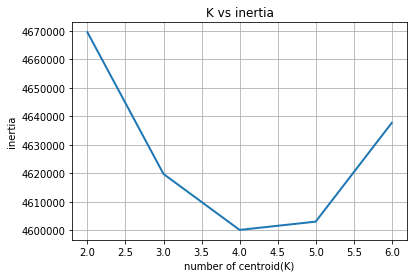

In [43]:
plt.plot(k,inertia,linewidth=2)
plt.xlabel('number of centroid(K)')
plt.ylabel('inertia')
plt.title('K vs inertia')
plt.grid()

From the elbow method we can observe k=4 will be ideal clustering in this case

In [0]:
# Applying K Mean Clustering with k=3
model=MiniBatchKMeans(n_clusters=3,init='k-means++').fit(final_matrix)

**Defining Utility Functions:**

In [0]:
import random
def get_cluster_points(model,cluster_no=1):
    cl=[]
    for i in range(len(model.labels_)):
        if(model.labels_[i]==cluster_no):
            cl.append(i)
    random_index = random.choices(cl,k=3)
    cluster_=x.iloc[random_index]
    return cluster_,cl
    

In [0]:
# Function to generate wordcloud
from wordcloud import WordCloud
def generateWordCloud(data):
    words=[]
    corpus=''
    for sentence in (data['essay'].values):
        sent=decontracted(sentence)
        sent=re.sub('[^A-Za-z]+',' ',sent)
        sent=sent.replace('\\r',' ')
        sent=sent.replace('\\t',' ')
        sent = sent.replace('\\"', ' ')
        for word in sent.split():
            if word not in stopwords and len(word)>2:
                words.append(word)
    print('processing...') 
    count=0
    for word in tqdm(words): 
        if(count<10000):
            corpus=corpus + word + ' '
            count=count+1
    wordcloud = WordCloud(width = 1000, height = 700,background_color ='white', min_font_size = 10).generate(corpus)                   
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 
    print('completed sucessfully!')
    

**Observing Points from Cluster 1:**

In [60]:
cluster_1,cl=get_cluster_points(model,cluster_no=1)
cluster_1

Unnamed: 0       id  ... clean_subcategories clean_grade
16711      123890  p190320  ...          VisualArts        3to5
66120        2224  p170642  ...  Literature_Writing        3to5
14607       69589  p067430  ...  Warmth Care_Hunger        3to5

[3 rows x 20 columns]

processing...


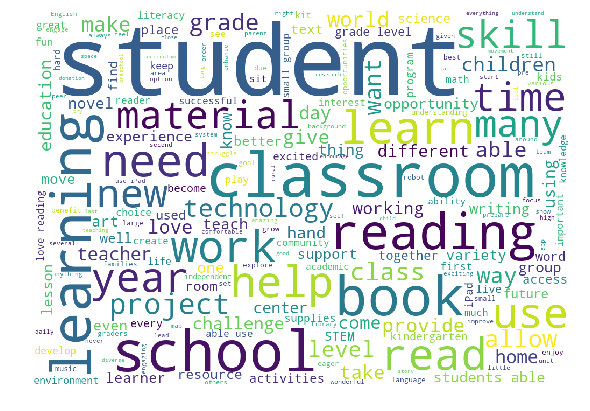

completed sucessfully!


In [61]:
# Generating world cloud
generateWordCloud(x.iloc[cl])

BY observation of above wordcloud,Most repeated words are school,classroom,reading,book,student,learning,material,learn,skill,help,many.

**Observing Points from Cluster 2:**

In [62]:
cluster_2,cl=get_cluster_points(model,cluster_no=2)
cluster_2

Unnamed: 0       id  ...             clean_subcategories clean_grade
99499        3713  p026279  ...  College_CareerPrep Mathematics        3to5
15600      174000  p246207  ...            Literacy Mathematics     PreKto2
84097       67878  p101101  ...                 ESL Mathematics     PreKto2

[3 rows x 20 columns]

processing...


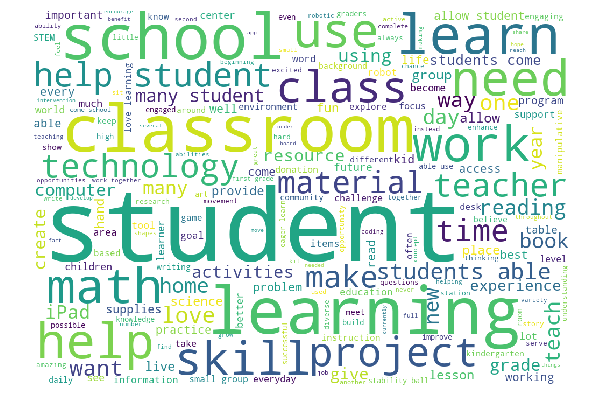

completed sucessfully!


In [63]:
# Generating world cloud
generateWordCloud(x.iloc[cl])

Most frequent words are Many,student,classroom,learning,class,school,learn,skill,project,help,need,work.

**Observing Points from Cluster 3:**

In [64]:
cluster_3,cl=get_cluster_points(model,cluster_no=3)
cluster_3

Unnamed: 0       id  ...    clean_subcategories clean_grade
57284       23525  p247580  ...  Literacy SpecialNeeds       9to12
72250       73275  p038189  ...           ESL Literacy        3to5
72062       81308  p130565  ...   Music PerformingArts        3to5

[3 rows x 20 columns]

processing...


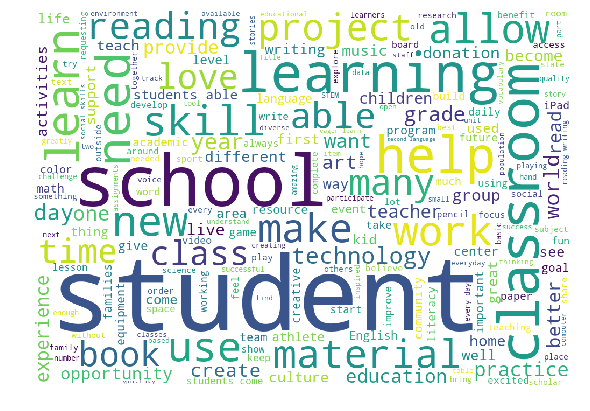

completed sucessfully!


In [65]:
# Generating world cloud
generateWordCloud(x.iloc[cl])

Most of repeated words are student,use,school,learning,help,reading,classroom,material,learn,reading,allow,able.

### Agglomerative Clustering :

In [0]:
# Applying agglomerative clustering with 3 clusters
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=3).fit(final_matrix.toarray())

**Observing Points from Cluster 1 :**

In [0]:
cluster_1,cl=get_cluster_points(model,cluster_no=1)
cluster_1

Unnamed: 0       id                        teacher_id teacher_prefix  \
7746      170569  p092305  70288fe0ef5e429d8ec68fb22ddfe99b            Mr.   
7746      170569  p092305  70288fe0ef5e429d8ec68fb22ddfe99b            Mr.   
7746      170569  p092305  70288fe0ef5e429d8ec68fb22ddfe99b            Mr.   

     school_state                Date project_grade_category  \
7746           TX 2017-03-07 11:32:24             Grades 6-8   
7746           TX 2017-03-07 11:32:24             Grades 6-8   
7746           TX 2017-03-07 11:32:24             Grades 6-8   

              project_title  \
7746  Pencils for students!   
7746  Pencils for students!   
7746  Pencils for students!   

                                        project_essay_1  \
7746  Visual and hands-on learners.  Visual and hand...   
7746  Visual and hands-on learners.  Visual and hand...   
7746  Visual and hands-on learners.  Visual and hand...   

                                        project_essay_2 project_essay_3  \
7746  Visual and hands-on learners.Visual and hands-...             NaN   
7746  Visual and hands-on learners.Visual and hands-...             NaN   
7746  Visual and hands-on learners.Visual and hands-...             NaN   

     project_essay_4                           project_resource_summary  \
7746             NaN  My students need pencils all of the time!  My ...   
7746             NaN  My students need pencils all of the time!  My ...   
7746             NaN  My students need pencils all of the time!  My ...   

      teacher_number_of_previously_posted_projects  price  quantity  \
7746                                             0  15.98        20   
7746                                             0  15.98        20   
7746                                             0  15.98        20   

                                                  essay clean_categories  \
7746  Visual and hands-on learners.  Visual and hand...     Math_Science   
7746  Visual and hands-on learners.  Visual and hand...     Math_Science   
7746  Visual and hands-on learners.  Visual and hand...     Math_Science   

     clean_subcategories clean_grade  
7746     AppliedSciences        6to8  
7746     AppliedSciences        6to8  
7746     AppliedSciences        6to8

processing...


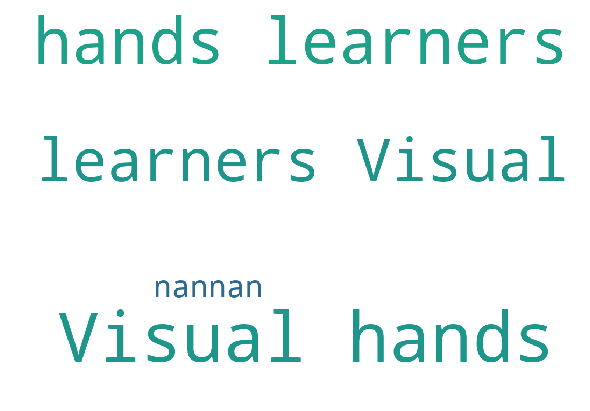

completed sucessfully!


In [0]:
generateWordCloud(x.iloc[cl])

Cluster 1 seems to be sparse one ,It can be outliers.

**Observing Points from Cluster 2 :**

In [0]:
cluster_2,cl=get_cluster_points(model,cluster_no=2)
cluster_2

Unnamed: 0       id                        teacher_id teacher_prefix  \
102032       51925  p024231  2776f973e34cb8d818750a671eb32951           Mrs.   
68026       139329  p219998  e5db471e8fb8fc418fddfef9d2a4644d        Teacher   
35161       172836  p127573  f2d672741086c1230de173a0c9b46e04           Mrs.   

       school_state                Date project_grade_category  \
102032           CA 2016-08-27 01:52:51          Grades PreK-2   
68026            FL 2016-08-16 12:37:01             Grades 3-5   
35161            IA 2017-04-19 22:55:05          Grades PreK-2   

                                    project_title  \
102032  Staying Active -- Physically and Mentally   
68026        Something Magical on the Bookshelf!!   
35161           Calling All Playground Equipment!   

                                          project_essay_1  \
102032  As a teacher in a highest poverty school distr...   
68026   My fifth grade students are AMAZING!!!!! The a...   
35161   I am fortunate enough to teach 12 second grade...   

                                          project_essay_2 project_essay_3  \
102032  \"Being a first grader is hard work!\" is what...             NaN   
68026   These books will allow the students to use the...             NaN   
35161   Our playground equipment is in need of some re...             NaN   

       project_essay_4                           project_resource_summary  \
102032             NaN  My students need Gaiam Balance Ball Fitness Ch...   
68026              NaN  My students need classroom sets of up to date ...   
35161              NaN  My students need new play ground equipment to ...   

        teacher_number_of_previously_posted_projects   price  quantity  \
102032                                             0  248.96        13   
68026                                              1   48.60        70   
35161                                             14   88.44        18   

                                                    essay  \
102032  As a teacher in a highest poverty school distr...   
68026   My fifth grade students are AMAZING!!!!! The a...   
35161   I am fortunate enough to teach 12 second grade...   

                     clean_categories               clean_subcategories  \
102032  AppliedLearning Health_Sports  EarlyDevelopment Health_Wellness   
68026               Literacy_Language                          Literacy   
35161                   Health_Sports                        TeamSports   

       clean_grade  
102032     PreKto2  
68026         3to5  
35161      PreKto2

processing...


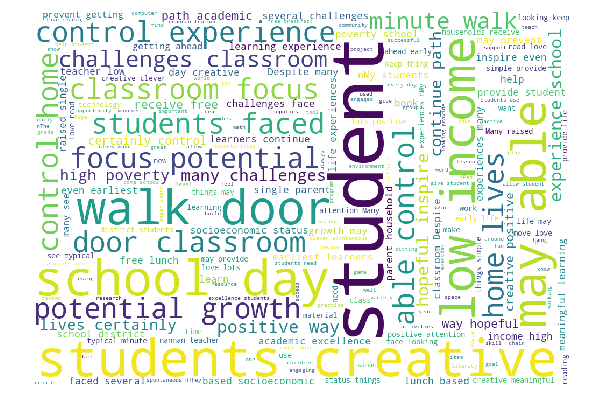

completed sucessfully!


In [0]:
generateWordCloud(x.iloc[cl])

**Observing Points from Cluster 3 :**

In [0]:
cluster_3,cl=get_cluster_points(model,cluster_no=0)
cluster_3

Unnamed: 0       id                        teacher_id teacher_prefix  \
83579      130678  p244471  52dec4e59a5e2b75c289e425432978c3            Ms.   
96918       49518  p218876  496843f17f1474cf0f6dda2fe5f6a3d0           Mrs.   
88039       25729  p215204  1e7e7474e3a3f7f25ce0ed77d482de57           Mrs.   

      school_state                Date project_grade_category  \
83579           NY 2016-11-15 20:52:47             Grades 3-5   
96918           CA 2017-04-11 18:27:18             Grades 3-5   
88039           WI 2016-11-02 17:08:26          Grades PreK-2   

                   project_title  \
83579          An Owl Ate That?!   
96918       iLearn Through iPads   
88039  We Wiggle While We Learn!   

                                         project_essay_1  \
83579  My name is Regina Davide. I am a fourth grade ...   
96918  Envision a classroom where all students are ac...   
88039  Kindergarten is a fun and exciting time for ki...   

                                         project_essay_2 project_essay_3  \
83579  I would love the chance to buy owl pellets for...             NaN   
96918  An iPad has so many uses in the classroom. Bri...             NaN   
88039  Kindergartners are full of energy!  We are con...             NaN   

      project_essay_4                           project_resource_summary  \
83579             NaN  My students need the opportunity to see scienc...   
96918             NaN  My students need 8 iPads to enable them to use...   
88039             NaN  My students need to be able to move when they ...   

       teacher_number_of_previously_posted_projects   price  quantity  \
83579                                             0    2.97        64   
96918                                            25  664.52         8   
88039                                             0   69.99         5   

                                                   essay  \
83579  My name is Regina Davide. I am a fourth grade ...   
96918  Envision a classroom where all students are ac...   
88039  Kindergarten is a fun and exciting time for ki...   

                     clean_categories             clean_subcategories  \
83579                    Math_Science            EnvironmentalScience   
96918               Literacy_Language              Literature_Writing   
88039  Literacy_Language Math_Science  Literature_Writing Mathematics   

      clean_grade  
83579        3to5  
96918        3to5  
88039     PreKto2

processing...


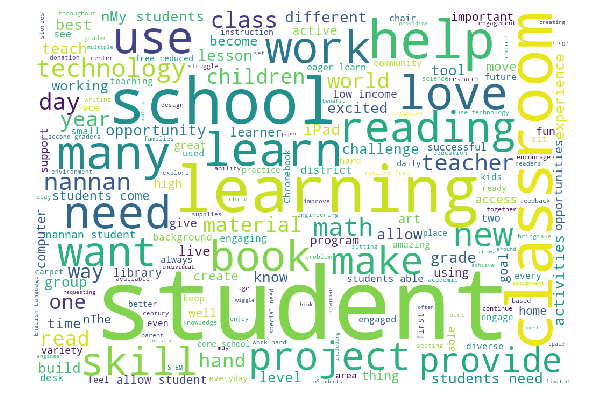

completed sucessfully!


In [0]:
# Generating world cloud
generateWordCloud(x.iloc[cl])

### DBSCAN :

In [0]:
from sklearn.neighbors import NearestNeighbors
min_pts=10
nbrs=NearestNeighbors(n_neighbors=min_pts, algorithm='ball_tree').fit(final_matrix)
distances=nbrs.kneighbors(final_matrix)


In [0]:
n_dist=[]
for dist in distances[0]:
    n_dist.append(dist[9])
n_dist_x=[]
for dist in (distances[1]):
    n_dist_x.append(dist[9])    

In [0]:
n_dist.sort()
n_dist_x.sort()

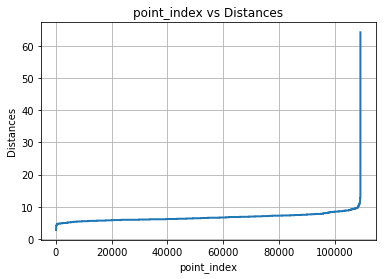

In [0]:
# plotting sorted distances against points to select eps
plt.plot(n_dist_x,n_dist,linewidth=2)
plt.xlabel('point_index')
plt.ylabel('Distances')
plt.title('point_index vs Distances')
plt.grid()

In [0]:
min_pts=10
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=10,min_samples=min_pts,algorithm='ball_tree',n_jobs=-1).fit(final_matrix)


**Observing points from cluster:**

In [0]:
cluster_,cl=get_cluster_points(model,cluster_no=0)
cluster_

Unnamed: 0       id                        teacher_id teacher_prefix  \
88985      132234  p100069  ccbcc1891f1dac105dcef5b753c2f268           Mrs.   
5963        73789  p152547  cc92ed507ea9ef1e2192a00ba9dde6e4           Mrs.   
37381      125528  p191667  4ae4c485d6c94f5e141d13858100bd03            Ms.   

      school_state                Date project_grade_category  \
88985           CA 2016-12-19 17:25:12          Grades PreK-2   
5963            CA 2016-10-26 12:38:42          Grades PreK-2   
37381           VA 2016-08-04 12:18:38             Grades 3-5   

                                          project_title  \
88985                     All Kindergarteners Can Read!   
5963   Engineering Companies- I'm Qualified for the Job   
37381           No More Baby Books for My Young Adults!   

                                         project_essay_1  \
88985  \"The more that you read, the more things you ...   
5963   An empty stomach is a hard way to come to scho...   
37381  I work at a Title I school where my fifth and ...   

                                         project_essay_2 project_essay_3  \
88985  Our students come to school eager to learn how...             NaN   
5963   My students need the play foam, playdoh and th...             NaN   
37381  Being a Fifth or Sixth grader can be tough. My...             NaN   

      project_essay_4                           project_resource_summary  \
88985             NaN  My students need literacy centers that target ...   
5963              NaN  My students need these items for developmental...   
37381             NaN  My students need high interest books that are ...   

       teacher_number_of_previously_posted_projects   price  quantity  \
88985                                            18   52.34         5   
5963                                              0  158.12         6   
37381                                             1  331.84        52   

                                                   essay  \
88985  \"The more that you read, the more things you ...   
5963   An empty stomach is a hard way to come to scho...   
37381  I work at a Title I school where my fifth and ...   

                     clean_categories    clean_subcategories clean_grade  
88985               Literacy_Language               Literacy     PreKto2  
5963          Math_Science Music_Arts  AppliedSciences Music     PreKto2  
37381  Literacy_Language SpecialNeeds  Literacy SpecialNeeds        3to5

processing...


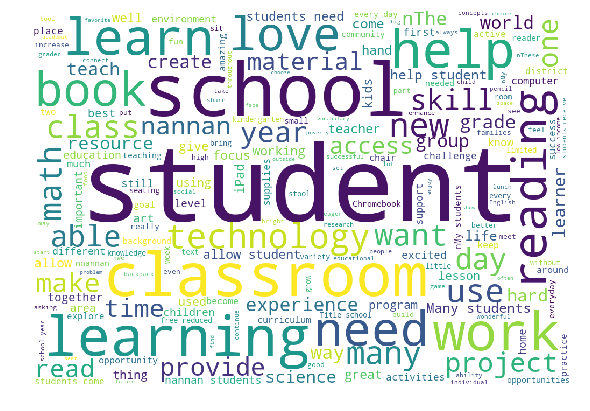

completed sucessfully!


In [0]:
generateWordCloud(x.iloc[cl])

# Conclusions:

**Observation(s):**

In [9]:
# Please compare all your models using Prettytable library/
#how to use pretty table http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

tb = PrettyTable()
tb1 =PrettyTable()

tb.field_names= ("cluster", "no of clusters" ,"result")

tb.add_row(["K-means",3,"good"])

tb.add_row(["DBSCAN", 3,"good"])

tb1.field_names= ("cluster", "min points","result")

tb1.add_row(["Agglomerative Clustering", 10,"not good"])





print(tb)
print(tb1)

+---------+----------------+--------+
| cluster | no of clusters | result |
+---------+----------------+--------+
| K-means |       3        |  good  |
|  DBSCAN |       3        |  good  |
+---------+----------------+--------+
+--------------------------+------------+----------+
|         cluster          | min points |  result  |
+--------------------------+------------+----------+
| Agglomerative Clustering |     10     | not good |
+--------------------------+------------+----------+


1. K Means, Agglomerative algorithms gives better clustering for this problem.
2. DBSCAN is computationally exhaustive algorithms , Only 20,000 points are considered for DBSCAN due to memory constraints.